In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

타이타닉 데이터 Feature 설명
-  survival - 생존유무, target 값. (0 = 사망, 1 = 생존)
-  pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
-  sex - 성별
-  Age - 나이(세)
-  sibsp - 함께 탑승한 형제자매, 배우자 수 총합
-  parch - 함께 탑승한 부모, 자녀 수 총합
-  ticket - 티켓 넘버
-  fare - 탑승 요금
-  cabin - 객실 넘버
-  bembarked - 탑승 항구

In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 1. 데이터 전처리


### 1-1. 결측값 확인

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
round(train.isnull().sum() / train.shape[0],4)*100

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

Age에 약 20%, Cabin에 약 77%의 결측치가 있음을 확인할 수 있다.

### 1-2 Target Label, Survived 확인


survival - 생존유무, target 값. (0 = 사망, 1 = 생존)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


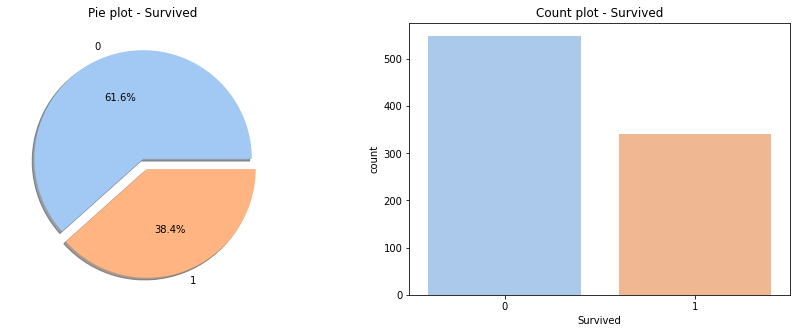

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# 2. 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)

 - 각 피처가 분류 분석에 미칠 영향에 대해 탐색해 본다. 
 - 이를 탐색하는 가장 좋은 방법은 데이터를 그룹(생존자 그룹/비생존자 그룹)으로 나누어 피처의 그룹 간 차이를 탐색한다.

### 2-1 Pcalss

pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


각 티켓 별 승선인원을 확인할 수 있는데 총 891명의 승객 중 1st class에 탑승한 인원은 216명, 2nd class에 탑승한 인원은 184명, 3rd class에 탑승한 인원은 491명임을 확인할 수 있다.

In [ ]:
pd.crosstab(train['Pclass'], train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


crosstab을 사용하여 pivot table을 확인할 수 있는데, 각 class별 생존 사망 여부를 한눈에 알 수 있다.

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


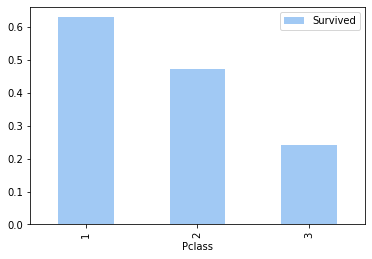

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

1st class의 생존이 63%, 2nd class의 생존이 47%, 3rd class 생존이 24%이므로 따라서 생존에 Pclass 가 큰 영향을 미친다고 생각해볼 수 있다

## 2-2 Sex

In [ ]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


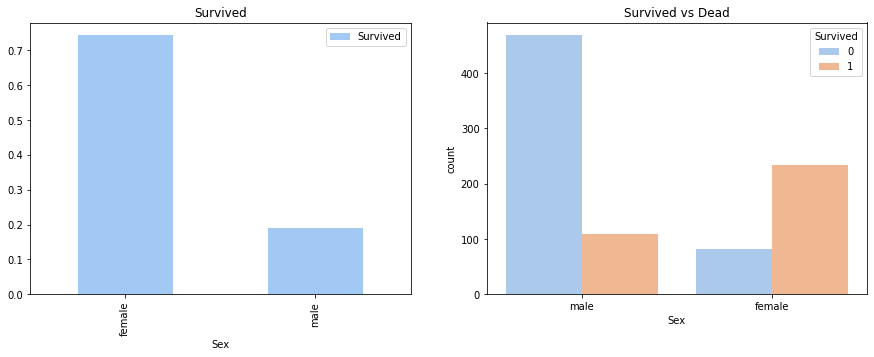

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.set_palette("pastel")
train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived')
sns.countplot('Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Survived vs Dead')
plt.show()

첫번째 plot 성별에 따른 생존확률을 보면 여자가 생존할 확률이 74.2%, 남자가 생존할 확률은 18.9%로 여자가 생존할 확률이 더 높은것을 확인 할 수 있고, 

두번째 plot 성별에 따른 생존, 사망을 숫자로 보면 남자는 사망이 높고, 여자는 생존이 높은 것을 보아 Pclass 와 마찬가지로, Sex 도 예측 모델에 쓰일 중요한 feature 임을 알 수 있다

## 2-3 Both Sex and Pclass

([<matplotlib.axis.XTick at 0x7f6db5dc8650>,
 <a list of 3 Text major ticklabel objects>)

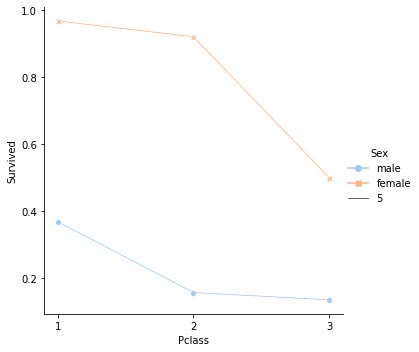

In [ ]:
sns.relplot(x="Pclass", y="Survived", data=train, 
           kind="line", style="Sex", hue="Sex", markers=True, dashes=False, ci=None, size=5)
plt.xticks([1,2,3])

모든 클래스에서 female 이 생존 확률이 male 보다 높고, 성별에 상관없이 3->2->1 클래스 순서로 생존 확률이 높은 것을 알 수 있다.

? 질문
여기에서 x축이 1 2 3 과 같이 class의 값들로만 나오게 변경하려면 어떻게 해보면 좋을까요?

## 2-4. Age

In [ ]:
print('제일 나이 많은 탑승객 : {:.1f} '.format(train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} '.format(train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} '.format(train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 
제일 어린 탑승객 : 0.4 
탑승객 평균 나이 : 29.7 


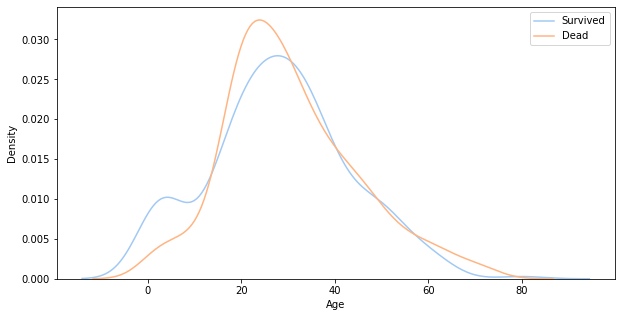

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(train[train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived', 'Dead'])
plt.show()

히스토그램을 보면 어린 나이(약 15세 미만) 구간에서 생존률이 상대적으로 높음을 확인할 수 있다.

In [ ]:
train['Age'].isnull().sum()

177

In [ ]:
train["Age"].fillna(train["Age"].mean() , inplace=True)

Age에서 발생하는 결측값은 나이의 평균으로 채워넣었다.

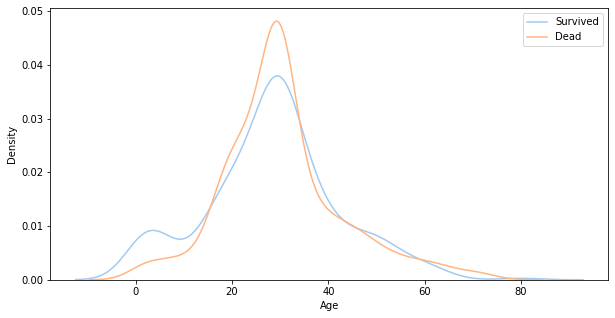

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(train[train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived', 'Dead'])
plt.show()

177개의 null값을 평균값으로 채워넣으니 히스토그램 분포가 가운데가 뾰족하게 나타나며 해당나이에서 사망 확률이 높아지는 것을 확인할 수 있다. (age의 null값이 대부분 사망이였나 ? )

## 2-5. Embarked

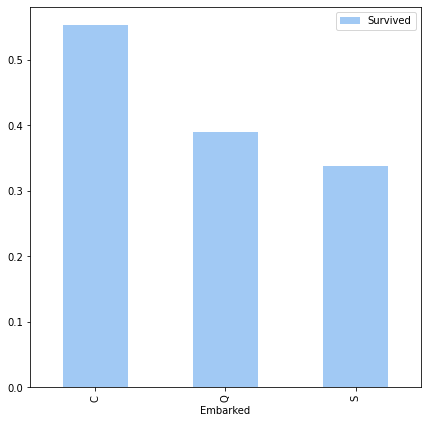

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True
                                      ).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [ ]:
pd.crosstab(train['Embarked'], train['Survived'], margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

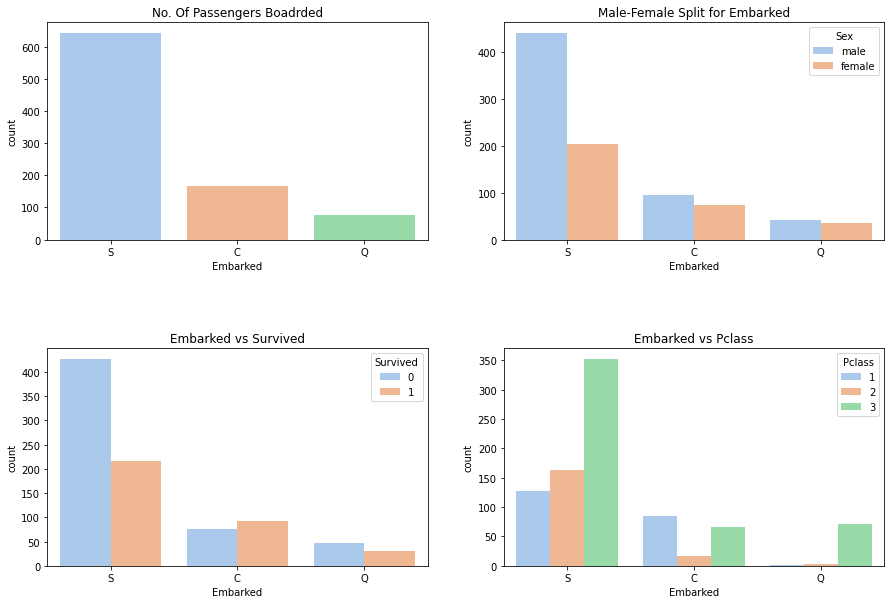

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot('Embarked', data=train, ax=ax[0,0])
ax[0, 0].set_title('No. Of Passengers Boadrded')
sns.countplot('Embarked', hue='Sex', data=train, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=train, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=train, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

bar plot 으로 볼때 탑승한 곳에 따라 생존률의 차이가 있는것 같아보였지만 수를 찍어보니 s에서 탑승한 사람이 많기때문에 더 많이 죽었을 수도 있지 않을까 라는 생각이 들어, 탑승한 곳에 따른 다른 변수들과의 상관관계를 확인해봤다.

탑승한 구간에 따른 성별의 차이도 별로없고, 생존여부에 대한 차이도, 티켓 등급의 차이도 없다.

# 2-6. Ticket

In [ ]:
train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

ticket은 티켓번호로 insight 를 찾을 수 없으므로 변수를 제외

## 2-7. Cabin

이 feature 는 80%가 Null값 이므로 제외한다.

## 2-8. SibSp & Parch

sib = 형제자매, Parch = 부모자식으로 해당 컬럼이 의미하는 바는 결국 가족의 수이다. 그리고 이를 통해 동승자 여부를 판단하는 alone이라는 변수를 생성한다.



In [ ]:
for dataset in train:
    # 가족수 = 형제자매 + 부모님 + 자녀 + 본인
    train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
    train['IsAlone'] = 1
    
    # 가족수 > 1이면 동승자 있음
    train.loc[train['FamilySize'] > 1, 'IsAlone'] = 0

In [ ]:
train['FamilySize'].max()

11

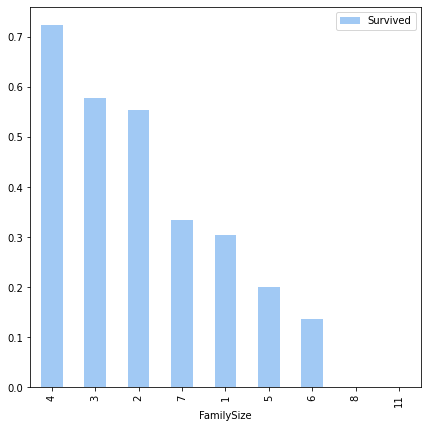

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True
                                      ).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

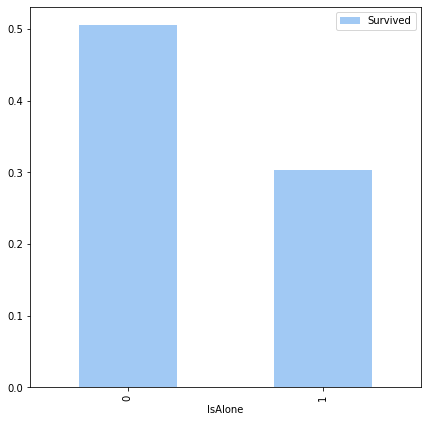

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=True
                              ).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

가족이 많은 사람들은 살아남았을까? 혼자 탄 사람은 얼마나 생존했을까 궁금해서 확인해봤으나, 큰 인사이트를 얻지 못했다. 4명 가족이 왜 가장 많이 살아남았을까? 아기들이 있어서일까? 정도의 추측만 해봄..

## 2-9. Fare

In [ ]:
print('가장 큰 요금의 금액은 : ', train['Fare'].max())
print('가장 작은 요금의 금액은 : ', train['Fare'].min())
print('평균 요금의 금액은 : ', train['Fare'].mean())

가장 큰 요금의 금액은 :  512.3292
가장 작은 요금의 금액은 :  0.0
평균 요금의 금액은 :  32.204207968574636


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

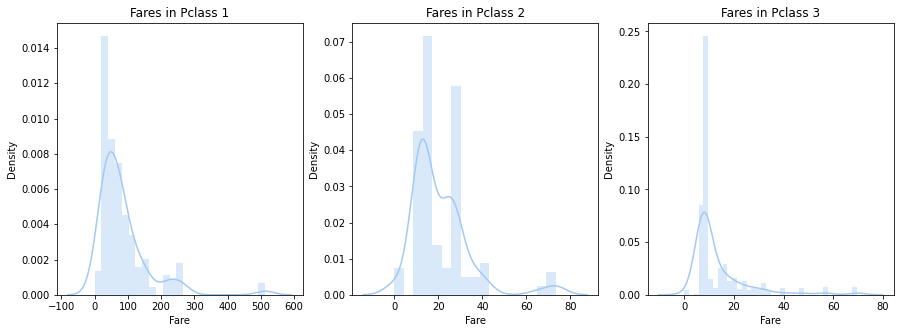

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.distplot(train[train['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

# 3.변수간 상관관계 분석

In [ ]:
train = train[['Survived','Pclass','Age','Fare','FamilySize','IsAlone','Embarked']]

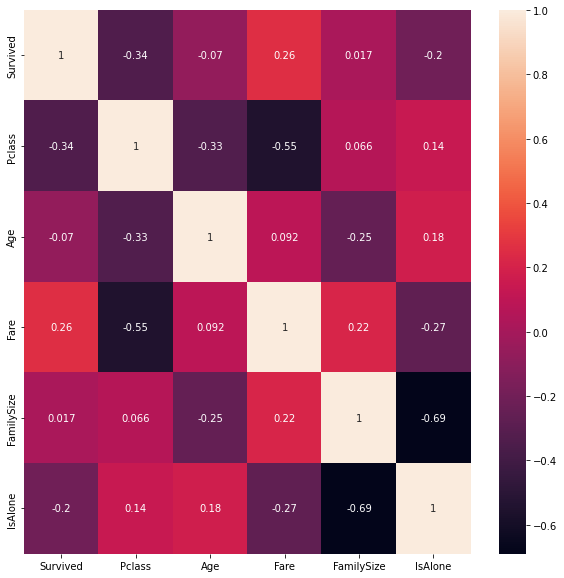

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colormap = plt.cm.RdBu
sns.heatmap(train.corr(), annot=True)

생존과 상관관계가 높은것은 순서대로 pclass->fare->isalone->age->familysize 인것을 알 수 있다.

그리고 각 변수별 상관관계를 확인했을 때 p class와 fare의 상관관계가 높으며, family size와 isalone의 상관관계가 높은것을 확인할 수 있다.